<a href="https://colab.research.google.com/github/maria366p/sentiment-adjusted-efficient-frontier/blob/main/01_data_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 01 — Exploración Inicial de Datos Financieros
Para la exploración inicial se va a descargar los precios históricos de varias acciones, se van a calcular retornos, voy a generar estadisticas básicas y a preparar lo que va a ser la base para los siguientes pasos del proyecto

In [9]:
!pip install yfinance plotly pandas numpy matplotlib seaborn --quiet

import yfinance as yf #Descarga precios históricos y datos financieros directamente desde Yahoo Finance.
import pandas as pd #Manipula datos en tablas tipo Excel (DataFrames) de forma eficiente.
import numpy as np #Realiza operaciones matemáticas y vectorizadas rápidas sobre arreglos numéricos.
import matplotlib.pyplot as plt #Genera gráficos básicos (líneas, barras, scatter) en Python.
import seaborn as sns #Sirve para hacer graficos que se vean profesionales

plt.style.use("seaborn-v0_8")




Se escogió analizar empresas que tienen una cantidad grande de noticias en linea, alta discusión en medios, buenos datasets en NewsAPI o FinBERT


/tmp/ipython-input-2867371706.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start="2018-01-01", end="2024-01-01")["Close"]
[*********************100%***********************]  10 of 10 completed


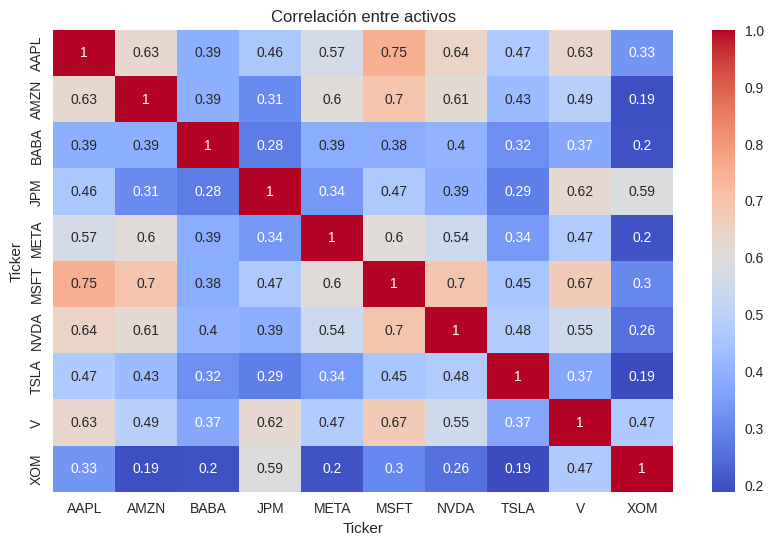

In [26]:
tickers = [ "AAPL", "TSLA", "BABA", "MSFT", "AMZN", "META", "NVDA","JPM","V", "XOM" ] #XOM: Exxon Mobil, energía
data = yf.download(tickers, start="2018-01-01", end="2024-01-01")["Close"]
data.head()
returns =  np.log(data / data.shift(1))  #data.shift(1) desplaza todo el DataFrame hacia abajo una fila
returns.isna().sum() #Revisar cuantos na hay en cada fila
returns.dropna() #Quitar todos los na
returns.describe().T  # sacar estadisticas basicas

# Ver correlaciones
plt.figure(figsize=(10,6))
sns.heatmap(returns.corr(), annot=True, cmap="coolwarm")
plt.title("Correlación entre activos")
plt.show()
